In [2]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.0/10.6 MB 495.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 491.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 525.1 kB/s eta 0:00:20
   ---------------------------------------- 0.1/10.6 MB 547.6 kB/s eta 0:00:20
    --------------------------------------- 0.1/10.6 MB 500.5 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.6 MB 482.7 kB/s eta 

In [2]:
pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:23
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:24
   ---------------------------------------- 0.1/24.8 MB 950.9 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 952.6 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 981.9 kB/s eta 0:00:26
   ---------------------------------------- 0.3/24.8 MB 1.0 MB/s eta 0:00:25
   ---------------------------------------- 0.3/24.8 MB 842.9 kB/s eta 0:00:30
    --------------------------------------- 0.3/24.8 MB 873.8 kB/s eta 0:00:29
    --------------------------------------- 0.4/24.8 MB 882.8 kB/s eta 0:00:28
    --------------------------------------- 0.4/24.8 MB 881.6 kB/s eta 0:00:28
    --------------------------------------- 0.5/24.8 MB 901.1 kB/s eta 0:

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import sklearn
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import random
import shutil
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.applications import InceptionResNetV2, InceptionV3, EfficientNetB0
from sklearn.model_selection import KFold
#from tensorflow.keras.applications import preprocess_input

In [ ]:
#ROOT_DIR='/kaggle/input/eurosat-dataset/EuroSAT'
#os.listdir(ROOT_DIR)

In [2]:
def load_images_from_directory(ROOT_DIR, normalize_rgb=False):
    images=[]
    labels=[]
    image_names=[]
    i=0
    for dir_name in os.listdir(ROOT_DIR):
        if os.path.isdir(os.path.join(ROOT_DIR,dir_name)):
            class_name = dir_name.split("\\")[-1]
            print(class_name)
            sub_dir_name = os.path.join(ROOT_DIR,dir_name)
            print(sub_dir_name)

            if os.path.isdir(sub_dir_name):    
                for img in os.listdir(sub_dir_name):
                    if img.endswith(('.jpg', '.jpeg', '.png')):                    
                        image_read = cv2.imread(os.path.join(ROOT_DIR,dir_name,img))
                        #print("{} image shape is : {}".format(img, image_read.shape))
                        img_cvt_color = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
                        
                        image_names.append(img)
                        images.append(img_cvt_color)
                        labels.append(class_name)
#        i+=1
#        if i==1:
#            break
    if normalize_rgb:
        return np.array(images)/255, np.column_stack((np.array(labels), np.array(image_names)))    
    else: 
        return np.array(images), np.column_stack((np.array(labels), np.array(image_names)))

In [3]:
def split_organize_data(root_dir, train_dir, test_dir, split_ratio=0.8):
    print("train dir : ", train_dir)
    print("test dir : ", test_dir)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    for class_folder in os.listdir(root_dir):
        class_source_dir=os.path.join(root_dir, class_folder)
        if not os.path.isdir(class_source_dir):
            continue
        
        train_class_dir = os.path.join(train_dir, class_folder)
        test_class_dir = os.path.join(test_dir, class_folder)
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        
        files = os.listdir(class_source_dir)
        
        random.shuffle(files)
        
        num_train = int(len(files)*split_ratio)
        num_test = len(files) - num_train
        
        train_files = files[:num_train]
        test_files = files[num_train:]
        
        print(train_class_dir)
        for file in train_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(train_class_dir, file))
        print(test_class_dir)
        for file in test_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(test_class_dir, file))
        

In [4]:
root_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\EuroSAT_RGB'
train_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\train'
test_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\test'
#root_dir="/kaggle/input/eurosat-dataset/EuroSAT"
#train_dir="/kaggle/working/eurosat-dataset/train"
#test_dir="/kaggle/working/eurosat-dataset/test"

In [38]:
split_organize_data(root_dir, train_dir, test_dir, 0.8)

train dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train
test dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\HerbaceousVegetation
C:\Users\Ab

In [8]:
# #Using Functional API, building RESNET-34

# #Need to make atleast 2 mehtods , one for final architecture, and one for residual unit
# def residual_block(inputs, filters , strides):
    
#     shortcut=inputs
#     print(shortcut.shape)
#     if strides!=1 or shortcut.shape[-1] != filters[-1]:
#         shortcut = tf.keras.layers.Conv2D(filters[0], 1, strides=strides, padding='same')(shortcut)
#         shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    
#     #First block 
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=strides, padding="same")(inputs)
#     x=tf.keras.layers.BatchNormalization()(x)
#     x=tf.keras.layers.Activation("relu")(x)
    
#     #Second Block
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=(1,1), padding="same")(x)
#     x=tf.keras.layers.BatchNormalization()(x)
    
#     #Third Block Skip Layer
#     x=tf.keras.layers.Add()([shortcut, x])
#     x=tf.keras.layers.Activation("relu")(x)
    
#     return x
    
# def stage(x, filters, block, strides):
#     for i in range(block):
#         if i == 0 :
#             x=residual_block(x, filters, strides)
#         else:
#             x=residual_block(x, filters, strides=1)
#     return x

# def build_resnet_34(input_shape=(64,64,3), num_classes=10 ):
#     inputs = tf.keras.layers.Input(shape=input_shape)
    
#     #Starting convolutional layers of kernel 7*7 and stride 2
#     x=tf.keras.layers.Conv2D(64, kernel_size=7, padding="same", strides=2, activation="relu")(inputs)
#     x=tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same")(x)
    
#     #Residual Blocks
#     x=stage(x,filters=[64],block=3, strides=1 )
#     x=stage(x,filters=[128],block=4, strides=2 )
#     x=stage(x,filters=[256],block=6, strides=2 )
#     x=stage(x,filters=[512],block=3, strides=1 )
    
#     #Final Output Layers
#     x=tf.keras.layers.GlobalAveragePooling2D()(x)
#     x=tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal")(x)
#     outputs= tf.keras.layers.Dense(num_classes, activation="softmax")(x)
#     model = tf.keras.Model(inputs, outputs)
#     return model


In [9]:
# model = build_resnet_34(input_shape=(64,64,3), num_classes=10) 

(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 512)
(None, 4, 4, 512)


In [5]:
#Making Resnet34 using class ResidualUnit to check the performance 
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.filters=filters
        self.strides=strides
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers=[]
        if strides > 1 :
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                   padding="same", use_bias=False),
                keras.layers.BatchNormalization()
            ]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z=layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z+skip_Z)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'filters': self.filters,
            'strides': self.strides,
            'activation': keras.activations.serialize(self.activation)
        })
        return config

In [6]:
# ##Resnet Model using Sequential API Keras

# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(64, 7, strides=2, 
#                               input_shape=[64,64,3],
#                              padding="same", use_bias=False))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="Same"))
# prev_filters=64
# for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
#     strides=1 if filters==prev_filters else 2
#     model.add(ResidualUnit(filters, strides=strides))
#     prev_filters = filters
# model.add(keras.layers.GlobalAvgPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:

def create_inception_resnet_v2_model(input_shape):
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    base_model.trainable = False

    inputs = keras.Input(shape=input_shape)

    x = base_model(inputs, training=False)

    # Add custom classification head
    #x = base_model.output
    #x = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="same", data_format="channels_last")(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x) 
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x) 
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model


In [12]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from datetime import datetime
# Create a TensorBoard callback to log gradients
log_dir = "C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\logs\\gradient\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("inception_resnetv2_2_transfer_learning.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

In [13]:
model=create_inception_resnet_v2_model((75,75,3))

In [14]:
model.compile(optimizer=Nadam(learning_rate=0.00005), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [15]:
model.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_4 (InputLayer)        [(None, 75, 75, 3)]       0         Y          
                                                                            
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  N          
 onal)                                                                      
                                                                            
 global_average_pooling2d_1   (None, 1536)             0         Y          
 (GlobalAveragePooling2D)                                                   
                                                                            
 dense_3 (Dense)             (None, 512)               786944    Y          
                                                                            
 dropout_2 (Dropout)         (None, 512)               0   

In [22]:
train_data=pd.read_csv('C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\training_image_list.csv')
print(train_data)

test_data = pd.read_csv("C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\test_image_list.csv")
print(test_data)

       Unnamed: 0           image_name       label
0               0  AnnualCrop_1916.jpg  AnnualCrop
1               1  AnnualCrop_1265.jpg  AnnualCrop
2               2  AnnualCrop_1517.jpg  AnnualCrop
3               3  AnnualCrop_2984.jpg  AnnualCrop
4               4  AnnualCrop_2921.jpg  AnnualCrop
...           ...                  ...         ...
21595       21595      SeaLake_112.jpg     SeaLake
21596       21596     SeaLake_2260.jpg     SeaLake
21597       21597     SeaLake_2202.jpg     SeaLake
21598       21598      SeaLake_361.jpg     SeaLake
21599       21599     SeaLake_2236.jpg     SeaLake

[21600 rows x 3 columns]
      Unnamed: 0           image_name       label
0              0  AnnualCrop_1762.jpg  AnnualCrop
1              1  AnnualCrop_2119.jpg  AnnualCrop
2              2  AnnualCrop_2735.jpg  AnnualCrop
3              3  AnnualCrop_1409.jpg  AnnualCrop
4              4   AnnualCrop_763.jpg  AnnualCrop
...          ...                  ...         ...
5395        

In [24]:
#### Setup Image Data Generator with augmentation

augment_data_generator=ImageDataGenerator(rotation_range=180, 
                                          width_shift_range=0.2, 
                                          height_shift_range=0.2, 
                                          rescale=1./255, 
                                          shear_range=0.3, 
                                          zoom_range=0.3, 
                                          horizontal_flip=True, 
                                          vertical_flip=True,
                                          validation_split=0.2,
                                          brightness_range=(0.7,1.3),
                                         data_format="channels_last")

#data_dir = '/kaggle/working/eurosat-dataset/train'

results=[]
all_history={}
fold=1

train_data['label'] = train_data['label'].astype(str)
Y = train_data[['label']]

n_splits = 5
kf = KFold(n_splits=n_splits,shuffle=True)

for fold_index, (train_index, val_index) in enumerate(kf.split(np.zeros(len(train_data)), Y)):
    
    print(f"Fold {fold_index + 1}")

    train_data_generator = augment_data_generator.flow_from_directory(
        train_dir, 
        target_size=(75,75),
        color_mode='rgb',
        batch_size=24,
        class_mode='sparse',
        subset='training',
        shuffle=True,
        seed=fold_index
    )

    validation_data_generator = augment_data_generator.flow_from_directory(
        train_dir, 
        target_size=(75,75),
        color_mode='rgb',
        batch_size=24,
        class_mode='sparse',
        subset='validation',
        shuffle=False,
        seed=fold_index
    )
    
    model = create_inception_resnet_v2_model((75,75,3))
    
    model.compile(optimizer=Nadam(learning_rate=0.00005), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )
    
    model.summary()
    
    model_name = f'./inception_resnet_v2_2_best_model_fold_{fold}.keras'
    
    history=model.fit(train_data_generator, 
                  epochs=50, 
                  validation_data=validation_data_generator,
                 callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_callback])
    
    all_history[f'history-fold-initial-{fold}'] = history
    
    for layer in model.layers[:]:
        layer.trainable = True
        
    model.compile(optimizer=Nadam(learning_rate=0.000001), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )
    
    
    history=model.fit(train_data_generator, 
                      epochs=100, 
                      validation_data=validation_data_generator, 
                      callbacks=[early_stopping_cb, tensorboard_callback, keras.callbacks.ModelCheckpoint(model_name, save_best_only=True)])        
    
    all_history[f'history-fold-final-{fold}'] = history
    
    loss, accuracy = model.evaluate(validation_data_generator)
    results.append((loss, accuracy))
    
    fold += 1
    

Fold 1
Found 17280 images belonging to 10 classes.
Found 4320 images belonging to 10 classes.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_2   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 512)               786944    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                               

Epoch 6/100
720/720 [==============================] - 200s 277ms/step - loss: 0.3428 - accuracy: 0.8834 - val_loss: 0.3314 - val_accuracy: 0.8877
Epoch 7/100
720/720 [==============================] - 197s 273ms/step - loss: 0.3519 - accuracy: 0.8834 - val_loss: 0.3329 - val_accuracy: 0.8900
Epoch 8/100
720/720 [==============================] - 199s 276ms/step - loss: 0.3241 - accuracy: 0.8922 - val_loss: 0.3030 - val_accuracy: 0.8972
Epoch 9/100
720/720 [==============================] - 202s 281ms/step - loss: 0.3103 - accuracy: 0.8969 - val_loss: 0.2974 - val_accuracy: 0.8958
Epoch 10/100
720/720 [==============================] - 201s 278ms/step - loss: 0.3167 - accuracy: 0.8955 - val_loss: 0.2946 - val_accuracy: 0.9009
Epoch 11/100
720/720 [==============================] - 200s 278ms/step - loss: 0.3029 - accuracy: 0.8997 - val_loss: 0.2830 - val_accuracy: 0.9060
Epoch 12/100
720/720 [==============================] - 200s 277ms/step - loss: 0.2854 - accuracy: 0.9047 - val_loss

720/720 [==============================] - 59s 82ms/step - loss: 0.7098 - accuracy: 0.7571 - val_loss: 0.6250 - val_accuracy: 0.7852
Epoch 22/50
720/720 [==============================] - 60s 83ms/step - loss: 0.7097 - accuracy: 0.7541 - val_loss: 0.6451 - val_accuracy: 0.7801
Epoch 23/50
720/720 [==============================] - 58s 81ms/step - loss: 0.7165 - accuracy: 0.7541 - val_loss: 0.6411 - val_accuracy: 0.7752
Epoch 24/50
720/720 [==============================] - 60s 82ms/step - loss: 0.7067 - accuracy: 0.7575 - val_loss: 0.6451 - val_accuracy: 0.7727
Epoch 25/50
720/720 [==============================] - 58s 81ms/step - loss: 0.6902 - accuracy: 0.7605 - val_loss: 0.6257 - val_accuracy: 0.7854
Epoch 26/50
720/720 [==============================] - 58s 80ms/step - loss: 0.6873 - accuracy: 0.7624 - val_loss: 0.6195 - val_accuracy: 0.7854
Epoch 27/50
720/720 [==============================] - 59s 82ms/step - loss: 0.6854 - accuracy: 0.7620 - val_loss: 0.6244 - val_accuracy: 0.78

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model_3/inception_resnet_v2/conv_7b/Conv2D/Conv2DBackpropFilter' defined at (most recent call last):
    File "C:\Users\Abhi\.conda\envs\python-tensorflow\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Abhi\.conda\envs\python-tensorflow\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Abhi\.conda\envs\python-tensorflow\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\Abhi\.conda\envs\python-tensorflow\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\Abhi\.conda\envs\python-tensorflow\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Abhi\AppData\Local\Temp\ipykernel_6504\1781574937.py", line 74, in <module>
      history=model.fit(train_data_generator,
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\Abhi\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model_3/inception_resnet_v2/conv_7b/Conv2D/Conv2DBackpropFilter'
OOM when allocating tensor with shape[1536,2080,1,1] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_3/inception_resnet_v2/conv_7b/Conv2D/Conv2DBackpropFilter}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_14249469]

In [25]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

def get_variable_and_size(namespace):
    for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(namespace.items())), key= lambda x: -x[1])[:10]:
        print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

In [26]:
get_variable_and_size(locals())

                    train_data:  3.1 MiB
                             Y:  1.4 MiB
                     test_data: 791.8 KiB
                   train_index: 67.6 KiB
                     val_index: 17.0 KiB
                           _ii:  2.9 KiB
                          _i24:  2.9 KiB
                          _iii:  2.9 KiB
                          _i23:  2.9 KiB
                          _i17:  2.8 KiB


In [32]:
# Aggregate results
avg_loss = np.mean([result[0] for result in results])
avg_accuracy = np.mean([result[1] for result in results])
print(f'Average loss: {avg_loss}, Average accuracy: {avg_accuracy}')

Average loss: 0.5556897163391114, Average accuracy: 0.8065277695655823


In [62]:
#del os.environ['TENSORBOARD_BINARY']

In [50]:
%load_ext tensorboard

In [35]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_4
1 inception_resnet_v2
2 global_average_pooling2d_1
3 dense_3
4 dropout_2
5 dense_4
6 dropout_3
7 dense_5


In [36]:
for layer in model.layers[:]:
    layer.trainable = True



In [37]:
#base_model.trainable = True
model.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_4 (InputLayer)        [(None, 75, 75, 3)]       0         Y          
                                                                            
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  Y          
 onal)                                                                      
                                                                            
 global_average_pooling2d_1   (None, 1536)             0         Y          
 (GlobalAveragePooling2D)                                                   
                                                                            
 dense_3 (Dense)             (None, 512)               786944    Y          
                                                                            
 dropout_2 (Dropout)         (None, 512)               0   

In [38]:
model.compile(optimizer=Nadam(learning_rate=0.000001,clipnorm=1.0), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [39]:
checkpoint_cb1 = keras.callbacks.ModelCheckpoint("inception_resnetv2_2_transfer_learning.keras", save_best_only=True)
early_stopping_cb1 = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

history=model.fit(train_data_generator, 
                  epochs=70, 
                  validation_data=validation_data_generator,
                 callbacks=[checkpoint_cb1, early_stopping_cb1, tensorboard_callback])

Epoch 1/70
720/720 [==============================] - 271s 312ms/step - loss: 0.4710 - accuracy: 0.8382 - val_loss: 0.3893 - val_accuracy: 0.8718
Epoch 2/70
720/720 [==============================] - 223s 309ms/step - loss: 0.4149 - accuracy: 0.8668 - val_loss: 0.3882 - val_accuracy: 0.8755
Epoch 3/70
720/720 [==============================] - 221s 307ms/step - loss: 0.3624 - accuracy: 0.8792 - val_loss: 0.3335 - val_accuracy: 0.8907
Epoch 4/70
720/720 [==============================] - 219s 304ms/step - loss: 0.3407 - accuracy: 0.8861 - val_loss: 0.3399 - val_accuracy: 0.8921
Epoch 5/70
720/720 [==============================] - 237s 329ms/step - loss: 0.3263 - accuracy: 0.8911 - val_loss: 0.3216 - val_accuracy: 0.8896
Epoch 6/70
720/720 [==============================] - 228s 316ms/step - loss: 0.3153 - accuracy: 0.8939 - val_loss: 0.2986 - val_accuracy: 0.9007
Epoch 7/70
720/720 [==============================] - 223s 310ms/step - loss: 0.3040 - accuracy: 0.8975 - val_loss: 0.2990 -

In [40]:
def create_graph_for_nn_training(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

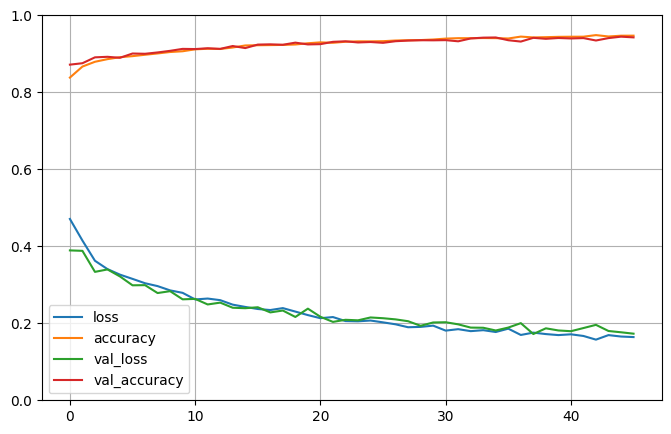

In [41]:
create_graph_for_nn_training(history)

In [27]:
model.evaluate(validation_data_generator)

180/180 [==============================] - 15s 64ms/step - loss: 0.6047 - accuracy: 0.7900


[0.604686975479126, 0.7900462746620178]

In [29]:
del model

model = tf.keras.models.load_model('inception_resnet_v2_2_best_model_fold_1.keras')

ResourceExhaustedError: failed to allocate memory [Op:AddV2]

In [ ]:
#test_dir='/kaggle/working/eurosat-dataset/test'
test_data_generator = augment_data_generator.flow_from_directory(
    test_dir, 
    target_size=(75,75),
    color_mode='rgb',
    batch_size=32,
    class_mode='sparse',
    interpolation="lanczos",
    shuffle=False
)

In [44]:
batch_size=32
test_data_generator.reset() 
y_pred = model.predict(test_data_generator)#,steps= math.ceil(test_data_generator.samples//batch_size),workers=8)

y_pred.shape

(5400, 10)

In [45]:
predicted_labels = np.argmax(y_pred, axis=1)

# Compare with ground truth labels
true_labels = test_data_generator.classes

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9385185185185185


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

def precision_recall_f1_value(actual_value, predicted_value, classes, average_type='binary'):
    precision_value = precision_score(actual_value, predicted_value, average=average_type)
    recall_value = recall_score(actual_value, predicted_value, average=average_type)
    f1 = f1_score(actual_value, predicted_value, average=average_type)
    conf_matrix = confusion_matrix(actual_value, predicted_value)
    print("Precision Value : " + str(precision_value))
    print("Recall value : " + str(recall_value))
    print("F1 Score : " + str(f1))
    print("Following is the confusion matrx for this model : ")
    print(conf_matrix)
    plt.matshow(conf_matrix, cmap=plt.cm.gray)
    
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes=classes
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes, rotation=0)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Precision Value : 0.9380313984051781
Recall value : 0.9362
F1 Score : 0.9368919852822053
Following is the confusion matrx for this model : 
[[559   0   1   8   0   7  13   0   2  10]
 [  1 594   0   0   0   3   0   1   0   1]
 [  1  16 542   5   0   9  13   8   3   3]
 [ 10   1  10 441   3   2   8   2  23   0]
 [  0   0   1   5 469   0   2  22   1   0]
 [  6  16   4   4   0 364   4   0   2   0]
 [ 14   0  26   1   4   1 451   2   1   0]
 [  0   2   3   1   3   0   2 587   2   0]
 [  3   1   0  17   0   2   0   0 475   2]
 [  3   5   0   1   0   2   0   0   3 586]]


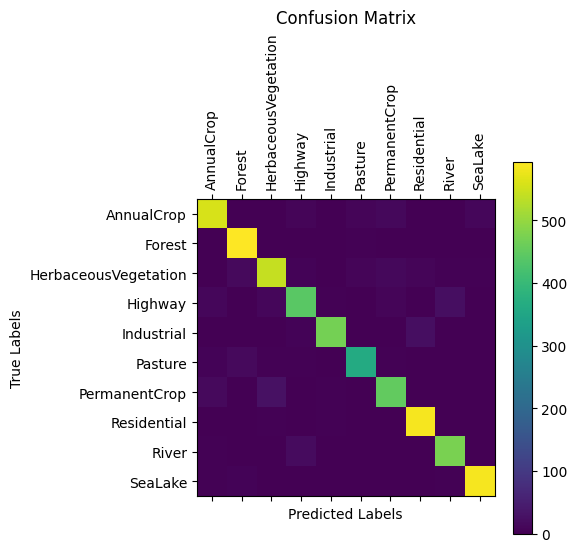

In [47]:
precision_recall_f1_value(true_labels, predicted_labels, ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"],"macro")

In [ ]:
%tensorboard --log-dir 'C:\\Users\\Abhi\\Jupyter_notebooks\\"Cloudxlab DS PGP"\\logs\\gradient' --port 6060